# BLSTM (Bidirectional Long Short-Term Memory) :

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250)]             0         
                                                                 
 embedding (Embedding)       (None, 250, 100)          1000000   
                                                                 
 bidirectional (Bidirection  (None, 250, 256)          234496    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 250, 128)          164352    
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                             

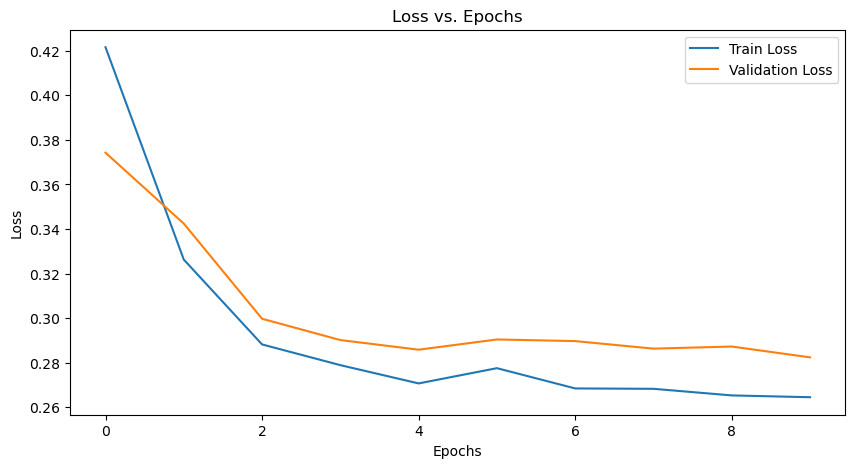

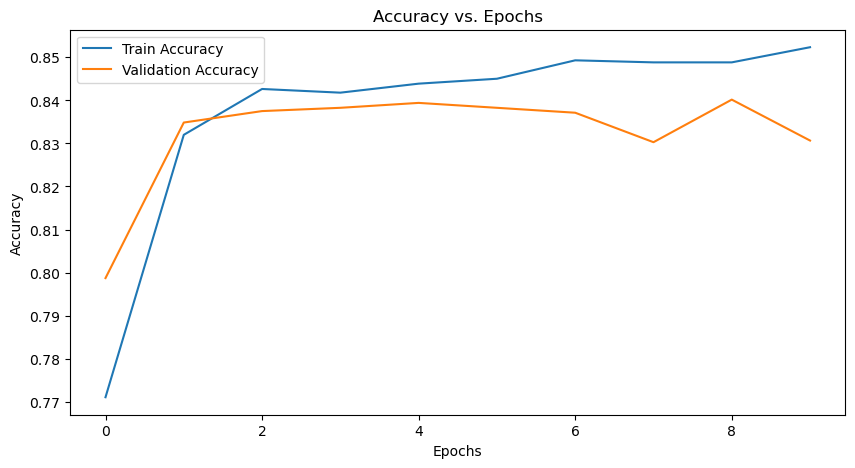

103/103 [==============================] - 38s 301ms/step
Accuracy: 0.837492391965916
Precision: 0.9600333055786844
Recall: 0.7034777303233679
F1 Score: 0.8119718309859156
AUC Score: 0.84
  l'architecture BLSTM utilisé pour ce modéle : 

Une couche d'entrée BLSTM avec 128 neurones.

Une couche BLSTM avec 64 neurones.

Une couche de sortie BLSTM avec 32 neurones.

Une couche fully connected (dense) avec 128 neurones et une fonction d'activation ReLU.

Une couche de sortie avec une fonction d'activation sigmoid pour la classification binaire.


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,BLSTM,0.837492,0.960033,0.703478,0.811972,0.837167


In [1]:
# Importez les bibliothèques nécessaires pour l'entraînement
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Input, Embedding, Bidirectional, LSTM, Dense
from keras.models import Model
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Chargement du dataset
df = pd.read_csv('../final_cleaned.csv')

# Séparation des features (X) et de la variable cible (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Division des données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Division de l'ensemble d'entraînement en ensembles d'entraînement et de validation (20% parmi 80% pour la validation)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convertissez vos données en tableaux NumPy si elles ne le sont pas déjà
X_train = np.array(X_train)
X_validation = np.array(X_validation)
y_train = np.array(y_train)
y_validation = np.array(y_validation)

# Assurez-vous que MAX_SEQUENCE_LENGTH et embedding_layer sont définis correctement
MAX_SEQUENCE_LENGTH = 250

# Préparez les données d'entrée pour le modèle LSTM en les convertissant en séquences de la longueur MAX_SEQUENCE_LENGTH
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_validation = pad_sequences(X_validation, maxlen=MAX_SEQUENCE_LENGTH)

# Créez le modèle BLSTM avec l'architecture spécifiée
inp = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = Embedding(input_dim=10000, output_dim=100, input_length=MAX_SEQUENCE_LENGTH)(inp)
x = Bidirectional(LSTM(128, return_sequences=True))(x)
x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = Bidirectional(LSTM(32))(x)
x = Dense(128, activation="relu")(x)
out = Dense(1, activation="sigmoid")(x)

model = Model(inp, out)

# Affichez l'architecture du modèle avec le détail des couches
model.summary()

# Assurez-vous que 'opt' est défini correctement comme optimiseur
opt = 'adam'

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Entraînez le modèle sur l'ensemble d'entraînement
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_validation, y_validation))

# Évaluez le modèle sur l'ensemble de test
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)  # Préparez également les données de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Visualisation de l'historique d'entraînement
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.show()

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Seuil de décision pour les prédictions binaires

# Calcul des métriques
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Affichage des métriques
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")
print(f"AUC Score: {auc:.2f}")


print("""  l'architecture BLSTM utilisé pour ce modéle : \n
Une couche d'entrée BLSTM avec 128 neurones.\n
Une couche BLSTM avec 64 neurones.\n
Une couche de sortie BLSTM avec 32 neurones.\n
Une couche fully connected (dense) avec 128 neurones et une fonction d'activation ReLU.\n
Une couche de sortie avec une fonction d'activation sigmoid pour la classification binaire.""")

blstm_results = pd.DataFrame([['BLSTM ', acc,prec,rec, f1, auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Sauvegardez le DataFrame dans un fichier CSV
blstm_results.to_csv('../evaluations/blstm_results.csv', index=False)

blstm_results

In [3]:
print("""  l'architecture BLSTM utilisé pour ce modéle : \n
Une couche d'entrée BLSTM avec 128 neurones.\n
Une couche BLSTM avec 64 neurones.\n
Une couche de sortie BLSTM avec 32 neurones.\n
Une couche fully connected (dense) avec 128 neurones et une fonction d'activation ReLU.\n
Une couche de sortie avec une fonction d'activation sigmoid pour la classification binaire.""")

  l'architecture BLSTM utilisé pour ce modéle : 

Une couche d'entrée BLSTM avec 128 neurones.

Une couche BLSTM avec 64 neurones.

Une couche de sortie BLSTM avec 32 neurones.

Une couche fully connected (dense) avec 128 neurones et une fonction d'activation ReLU.

Une couche de sortie avec une fonction d'activation sigmoid pour la classification binaire.
